# $\pi$

U ovoj bilježnici proučit ćemo nekoliko formula za slavnu matematičku konstantu $\pi$, i usporediti njihovu konvergenciju.

## Arhimed (stari vijek)

Prvi algoritam za računanje $\pi$ je dao Arhimed (oko 250. pr. Kr.), koristeći iduću zanimljivu ideju. Promotrimo grafove:

In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import numpy as np
%matplotlib inline

#NACRTAJ GRAFOVe
def crtaj(n):
    "Ova funkcija crta krug i njemu upisani i opisani 3*2^n-terokut."
    k = n
    #Ovdje koristimo pi samo radi jednostavnosti
    alpha = np.pi/k
    print(k)
    
    fig, ax = plt.subplots()
    # create 3x3 grid to plot the artists
    grid = np.mgrid[0.2:0.8:10j, 0.2:0.9:10j].reshape(2, -1).T

    patches = []

    #dodaj krug
    circle = mpatches.Circle(grid[0], 0.1, ec="none")
    patches.append(circle)

    #dodaj opisani n-terokut
    polygon = mpatches.RegularPolygon(grid[0], k, 0.1/np.cos(alpha))
    patches.append(polygon)

    #dodaj upisani n-terokut
    polygon = mpatches.RegularPolygon(grid[0], k, 0.1)
    patches.append(polygon)

    colors = np.linspace(0, 1, len(patches))
    collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.4)
    collection.set_array(np.array(colors))
    ax.add_collection(collection)

    plt.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.tight_layout()

    plt.show()
    return;

interact(crtaj, n=widgets.IntSlider(min=3,max=20,step=1,value=3));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0zLCBkZXNjcmlwdGlvbj11J24nLCBtYXg9MjAsIG1pbj0zKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWnigKY=


Vidimo da će se opsezi $n$-terokuta proizvoljno blizu približiti opsegu kruga. Opseg n-terokuta $n*2R\sin\left(\frac{\pi}{n}\right)$ geometrijski vidimo da teži u $2R\pi$. Ustvari, ovo je samo slavni limes $\lim\limits_{x\to 0} \frac{\sin x}{x}$ u dvije tisuće godina starom izdanju. No, razlog zašto ovo daje efektivni algoritam za računanje $\pi$ je (naravno) taj što nam *ne treba* $\pi$ unaprijed! Možemo koristiti formulu $\sin \alpha = \sqrt{\frac{1-\cos 2\alpha}{2}}$ te tako dobivati sve manje kutove i aproksimativno računati limes.

Arhimed je ovom metodom ustvrdio nejednakost $\frac{223}{71}<\pi<\frac{22}{7}$, gdje je gornja ograda dobro poznata aproksimacija od $\pi$. Ovo je bila glavna metoda računanja aproksimacija za $\pi$ za tisućljeće i pol! Arhimedov račun kreće od jednakostraničnog trokuta (dakle $n=3$) te nastavlja raspolovljavanjem. Promotrimo rezultate Arhimedove metode:

In [20]:
import sympy as sp
sp.init_printing()

def sn(n):
    k = 3*2**n
    if k == 3:
        return sp.sin(sp.pi/3)
    else:
        cs = sp.sqrt(1-sn(n-1)**2) #pitagorin poucak
        return sp.sqrt((1-cs)/2)

def calc(n):
    #convert sympy to latex
    str = sp.latex(3*2**n*sn(n))
    str = '$' + str + '$'

    #cheat: s matplotlib iscrtaj latex jer neće drugačije
    import matplotlib.pyplot as plt
    %matplotlib inline

    fig = plt.figure()
    fig.suptitle(str, fontsize=14+n, fontweight='bold')

    ax = fig.add_subplot(111)
    fig.set_size_inches(0.05, 0.05, forward=True)
    plt.axis('off')

    plt.show()
    print(sp.N(3*2**n*sn(n)))
    return;

interact(calc, n=widgets.IntSlider(min=0,max=10,step=1,value=0));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J24nLCBtYXg9MTApLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWRnZXQtaW50ZXJhY3TigKY=


<function calc at 0x09ABCC70>


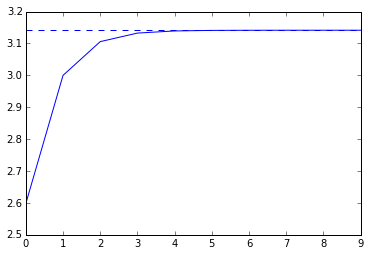

In [176]:
import matplotlib.pyplot as plt
import numpy as np

def rez(n):
    return 3*2**n*sn(n);
nprez = np.vectorize(rez)

fig, ax = plt.subplots()
plt.axhline(y=np.pi, xmin=0, xmax=1, hold=None, linestyle='--')
ax.plot(np.arange(10), nprez(np.arange(10)))
ax.legend(loc=9)

Za $n=10$ dobivamo $\pi$ na 5 decimala što ukazuje na to da je konvergencija dobra. To je također ilustrirano gornjim grafom.
Naravno, zbog uzastopnog računa drugog korijena ova metoda je složena i postići veliku preciznost ovom metodom se čini uzaludno. *Ipak*, ovo je ista metoda kojom je Ludolph van Ceulen računao $\pi$ do $35$ decimala, po čemu je $\pi$ nekad zvan i *Ludolphov broj* (da dobije tu točnost morao je koristit $2^{62}$-terokut. U nedostatku pametnog posla, 1630, je ova aproksimacija još poboljšana na 38 decimala (za što je pak trebalo cca. $10^{40}$-terokut). Time vidimo i da je konvergencija otprilike logaritamska u broju stranica!

## Kerala (srednji vijek)

Tek potkraj srednjeg vijeka je Indijska škola matematike iz Kerale (Indija) unaprijedila ove metode otkrivanjem beskonačnih redova za trigonometrijske funkcije. To ih je dovelo do otkrića npr. Leibnizovog reda 200 godina prije, ali zapad nije dugo bio upoznat s njihovim otkrićima.

In [53]:
import sympy as sp
sp.init_printing()

n=10
x=sp.Symbol('x')
sp.series(sp.atan(x),x,0,n)

     3    5    7    9         
    x    x    x    x     ⎛ 10⎞
x - ── + ── - ── + ── + O⎝x  ⎠
    3    5    7    9          


Pokušajmo evaluirati taj red. U idućim linijama su dana dva *pomičnika*(!?) u kojima se mogu prilagoditi broj članova reda $n$ i vrijednost u kojoj ga evaluiramo $x$. Kao što je dobro znano, red divergira za $x>1$. (Ovdje je interval $[0,1]$ podijeljen na 100 dijelova.)

In [130]:
import numpy as np

def arctan(x,n):
    x /= 100.;
    s = 0;
    p = x;
    for i in range(1,n):
        s += p;
        p = -p*x*x*(2*i-1)/(2*i+1)
    print(s)
    return;

interact(arctan, x=widgets.IntSlider(min=1,max=100,step=1,value=1), n=widgets.IntSlider(min=1,max=100,step=1,value=1));
np.pi/4

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J3gnLCBtaW49MSksIEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J24nLCBtaW49MSnigKY=


0.7853981633974483

Za usporedbu pri kraju smo napisali vrijednost $\frac{\pi}{4}$ eksplicitno izračunatu. Vidimo da je konvergencija jako spora. Također se primjećuje zanimljiv fenomen kako pomičemo $n$ - vrijednost se dosta mijenja između parnih i neparnih $n$. Razlog je to što je red alternirajući.

Red jako sporo konvergira za rubni slučaj $x=1$. Pogledajmo još dva zanimljiva argumenta od $\arctan x$:

$\frac{1}{\sqrt{3}}$, $2-\sqrt{3}$ i iskoristimo gornji kod za aproksimaciju.

In [122]:
#računamo aproksimaciju od arctan(1/sqrt(3)) - za 1/sqrt(3)=0.577 treba ispasti cca 0.5235
print(sp.atan(1/sp.sqrt(3)))
print(1/sp.sqrt(3).evalf())
interact(arctan, x=57.7, n=widgets.IntSlider(min=1,max=100,step=1,value=1));
sp.atan(1/sp.sqrt(3)).evalf()

pi/6
0.577350269189626


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTU3LjcsIGRlc2NyaXB0aW9uPXUneCcsIG1heD0xNzMuMTAwMDAwMDAwMDAwMDIsIG1pbj0tNTcuNyksIEludFNsaWRlcijigKY=


0.523598775598299

In [128]:
#računamo aproksimaciju od arctan(2-sqrt(3)) - za 1/sqrt(3)=0.577 treba ispasti cca 0.5235
print(sp.atan(2-sp.sqrt(3)))
print(2-sp.sqrt(3).evalf())
interact(arctan, x=26.795, n=widgets.IntSlider(min=1,max=100,step=1,value=1));
sp.atan(2-sp.sqrt(3).evalf()).evalf()

pi/12
0.267949192431123


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTI2Ljc5NSwgZGVzY3JpcHRpb249dSd4JywgbWF4PTgwLjM4NSwgbWluPS0yNi43OTUpLCBJbnRTbGlkZXIodmFsdWU9MSzigKY=


0.261799387799150

Vidimo da je konvergencija gore uvjetovana našim lošim aproksimiranjem argumenta, ali i trebamo primijetiti koliko red dobro konvergira - za argument $\frac{1}{\sqrt{3}}$ dobivamo 13-tak znamenki u 25 iteracija, a za još manji argument $2-\sqrt{3}$ dobivamo konvergenciju već za 12 iteracija.

Ustvari, matematičari iz Kerala škole su upravo pomoću gornje formule za argument $\frac{1}{\sqrt{3}}$ računali $\pi$.

U gornjim primjerima smo koristili to da za manje argumente red brže konvergira. No, može li se konvergencija reda za $arctan(1)$ popraviti pa da i taj red služi računu? Koristit ćemo dva algoritma iz sympy-ja. Ti algoritmi će nam dati malo bolje inačice redova koje će brže konvergirati.

Promotrimo obični Leibnizov red:

In [146]:
from sympy.abc import k, n
from sympy import Sum
A = Sum((-1)**(k+1)*(2*k-1)**-1, (k, 1, n))
print(round(A.subs(n, 99).evalf(), 10))
print(round(A.subs(n, 100).evalf(), 10))
print((sp.pi/4).evalf())

0.7879233515
0.7828982259
0.785398163397448


Usput vidimo da bi usrednjavanje sume do $99$. i $100$. člana dalo sasvim bolju aproksimaciju. Usrednjivanje je još jedan način ubrzanja konvergencije alternirajućih redova.

Kako bilo, pokušajmo sada Shanksovo ubrzanje:

In [161]:
from sympy.series.acceleration import shanks
print(round(shanks(A, n, 100).evalf(), 10))
print(round(((sp.pi)/4).evalf(), 10))     # Exact value

0.7853982259
0.7853981634


I vidimo da je konvergencija daleko bolja.

## Random metode aproksimacije

Dalje tokom povijesti su se koristile razno razne metode poput Machinovih formula i puno boljih redova poput Ramanujanovog, ili još boljeg od braće Chudnovsky. Svi ti algoritmi su u suštini isti (Machin formule se isto računaju pomoću redova za $arctan$). Vrlo zanimljiva metoda za računanje $pi$-ja, iako slabo efektivna je slučajna metoda. Ako znamo da vjerojatnost nečega treba biti oko $\pi$ (tj. naravno oko nekog multipla od $\pi$ između 0-1), onda možemo se nadati u dovoljno mnogo pokušaja dobiti $pi$ s nekom točnosti.

Ideja je simulirati pikado. Slučajno bacamo točke, npr. u kvadratu $[0,1]*[0,1]$ i pazimo kada će upasti u upisani krug.

3.28


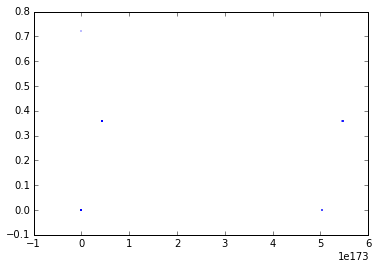

In [13]:
import random as rand
import math as math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ukupno = 100
unutra = 0

x_array = np.empty(shape=(1,ukupno))
y_array = np.empty(shape=(1,ukupno))

# Iterate for the number of darts.
for i in range(0, ukupno):
    # Generate random x, y in [0, 1].
    x = rand.random()
    y = rand.random()
    x_array = np.append(x_plot_array, [x])
    y_array = np.append(y_plot_array, [y])
    # Increment if inside unit circle.
    if math.sqrt(x**2 + y**2) < 1.0:
        unutra += 1

# inside / total = pi / 4
pi = (float(unutra) / ukupno) * 4

# It works!
print(pi)

#treba popraviti, ne radi ispravno
fig, ax = plt.subplots()
random_points_plot = plt.scatter(x_array, y_array, color='blue', s=.1)
circle_plot = plt.Circle( ( 0, 0 ), 1, color='red', linewidth=2, fill=False)
ax.add_artist(randomtocke)

plt.show()

Vidimo da je konvergencija poprilično slaba.